PROJECT DONE BY MAUZUM SHAMIL

In [1]:
%pip install keras


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# loading and preprocessing

In [ ]:
df = pd.read_csv(r"C:\Users\dell\Desktop\DATASETS\drug200.csv")

In [7]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [12]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [10]:
df.shape

(200, 6)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    # Fit and transform the column
    df[col] = le.fit_transform(df[col])


In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [20]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [21]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


<Axes: >

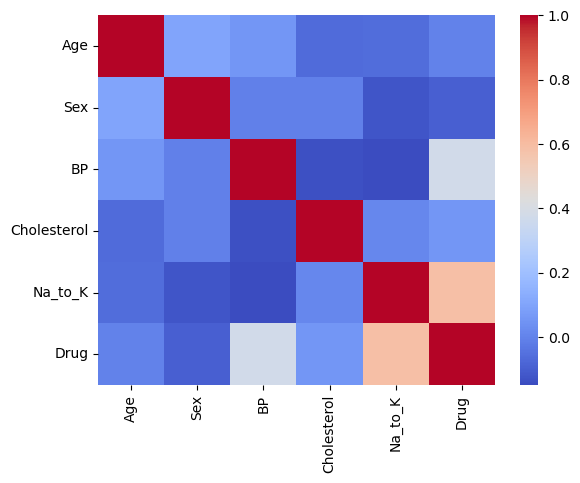

In [22]:
sns.heatmap(df.corr(),cmap='coolwarm')

# splitting 

In [25]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
x_train.shape

(150, 5)

# model building

In [30]:
model = Sequential()
model.add(Dense(12,activation='relu',input_dim=5,kernel_initializer='uniform'))
model.add(Dense(8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='softmax',kernel_initializer='uniform'))

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=150,batch_size=10,verbose=1)
scores = model.evaluate(x_test,y_test)

Epoch 1/150


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1085 - loss: 0.0000e+00   
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 0.0000e+00 
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0839 - loss: 0.0000e+00 
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1010 - loss: 0.0000e+00 
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1199 - loss: 0.0000e+00 
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0849 - loss: 0.0000e+00 
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1029 - loss: 0.0000e+00 
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1045 - loss: 0.0000e+00 
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0774 - loss: 0.0000e+00     
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0992 - loss: 0.0000e+00 
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0872 - loss: 0.0000e+00 
Epoch 12/150
1

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


In [49]:
model.metrics_names

['loss', 'compile_metrics']

In [50]:
print( "%s : %0.2f%%" %(model.metrics_names[1],scores[1]*100))

compile_metrics : 6.00%


# CONCLUSION

In [51]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [44]:
y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int32

In [52]:
TESTING = [[23	,0	,0	,0	,25.355]]
testing = np.array(TESTING)
model.predict(testing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


array([[1.]], dtype=float32)

In [53]:
TESTING = [[47	,1	,1	,0	,10.114]]
testing = np.array(TESTING)
model.predict(testing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)